In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data=pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [4]:
le=LabelEncoder()

In [5]:
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'])
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [7]:
x=data.drop('Performance Index',axis=1)
y=data['Performance Index']

In [8]:
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [9]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=35)

In [11]:
x_train.shape

(7500, 5)

In [12]:
x_test.shape

(2500, 5)

In [13]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [69]:
model=Sequential()
model.add(Dense(10,input_dim=5,activation='relu',kernel_initializer='uniform'))
model.add(Dense(15,activation='relu',kernel_initializer='uniform'))
model.add(Dense(20,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='linear'))

C:\Users\ajwad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.compile(loss='MAE',optimizer=SGD(learning_rate=0.1),metrics=['MAE'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 566 (2.21 KB)

 Trainable params: 566 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history=model.fit(x_train_scaled,y_train,epochs=80,batch_size=20,validation_data=(x_test_scaled,y_test))
training_history

Epoch 1/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 7.3268 - loss: 7.3268 - val_MAE: 5.9152 - val_loss: 5.9152
Epoch 2/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 6.7764 - loss: 6.7764 - val_MAE: 7.0403 - val_loss: 7.0403
Epoch 3/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 6.7264 - loss: 6.7264 - val_MAE: 7.7997 - val_loss: 7.7997
Epoch 4/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - MAE: 6.8976 - loss: 6.8976 - val_MAE: 4.0317 - val_loss: 4.0317
Epoch 5/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - MAE: 6.7034 - loss: 6.7034 - val_MAE: 6.5548 - val_loss: 6.5548
Epoch 6/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MAE: 7.2588 - loss: 7.2583 - val_MAE: 5.3428 - val_loss: 5.3428
Epoch 7/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - MAE: 6.3709 - loss: 6.3709 - val_MAE: 6.8623 - val_loss: 6.8623
Epoch 8/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MAE: 5.8723 - loss: 5.8723 - val_MAE: 4.7957 - val_loss: 4.7957
Epoch 9/80
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MA

In [ ]:
hist=training_history.history
hist.keys()

In [ ]:
hist['val_MAE'][-1]


Text(0, 0.5, 'loss')

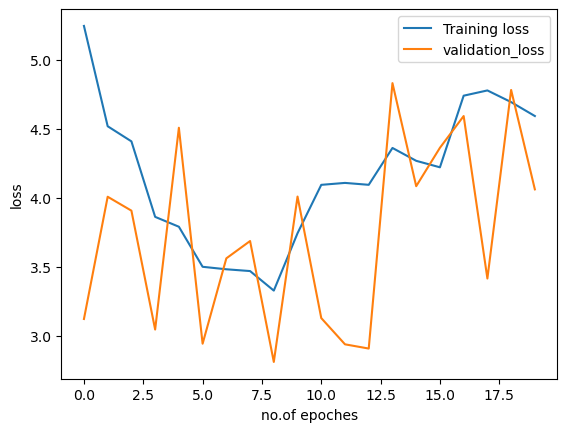

In [53]:
plt.plot(hist['loss'],label='Training loss')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epoches')
plt.ylabel('loss')